In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# from sklearn.cluster import KMeans

# from sklearn.datasets import make_blobs

In [3]:
def distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

In [4]:
def initialize_centroids(X, k):
    indices = np.random.choice(len(X), k, replace=False)
    return X[indices]

In [5]:
def kmeans_iteration(X, centroids):
    k = len(centroids)
    clusters = [[] for _ in range(k)]
    for point in X:
        closest_centroid_idx = np.argmin([distance(point, centroid) for centroid in centroids])
        clusters[closest_centroid_idx].append(point)
    new_centroids = np.array([np.mean(cluster, axis=0) if cluster else centroid for cluster, centroid in zip(clusters, centroids)])
    return new_centroids, clusters

In [6]:
def compute_distortion(X, centroids, clusters):
    distortion = 0
    for i, cluster in enumerate(clusters):
        if cluster:
            for point in cluster:
                distortion += distance(point, centroids[i]) ** 2
    return distortion

In [20]:
def select_optimal_k(X, max_clusters, max_iterations):
    distortions = []
    for k in range(1, max_clusters + 1):
        centroids = initialize_centroids(X, k)
        for i in range(max_iterations):
            new_centroids, clusters = kmeans_iteration(X, centroids)
            if np.allclose(new_centroids, centroids):
                break
            centroids = new_centroids
        distortion = compute_distortion(X, centroids, clusters)
        distortions.append(distortion)
    #Добавил деление
    distortions = [abs(distortions[i] - distortions[i + 1]) / abs(distortions[i] - distortions[i - 1]) for i in range(0, len(distortions) - 1)]
    optimal_k = np.argmax(distortions) + 1
    return optimal_k

In [11]:
def kmeans_with_optimal_k(X, max_clusters, max_iterations):
    optimal_k = select_optimal_k(X, max_clusters, max_iterations)
    centroids = initialize_centroids(X, optimal_k)
    for i in range(max_iterations):
        new_centroids, clusters = kmeans_iteration(X, centroids)
        if np.allclose(new_centroids, centroids):
            break
        centroids = new_centroids
        plot_clusters(X, centroids, clusters)

In [12]:
def plot_clusters(X, centroids, clusters):
    plt.figure()
    for i, cluster in enumerate(clusters):
        if cluster:
            cluster_points = np.array(cluster)
            plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i + 1}')
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', label='Centroids')
    plt.legend()
    plt.title('K-Means Clustering')
    plt.show()

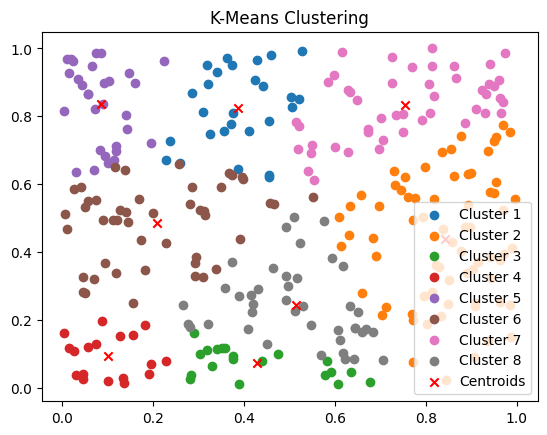

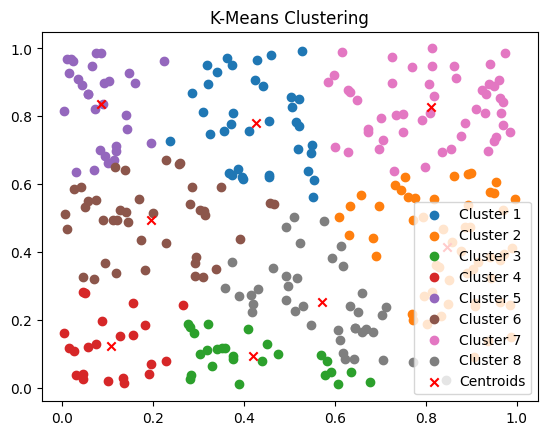

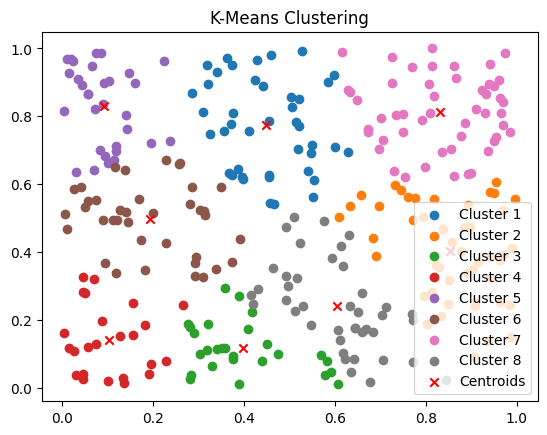

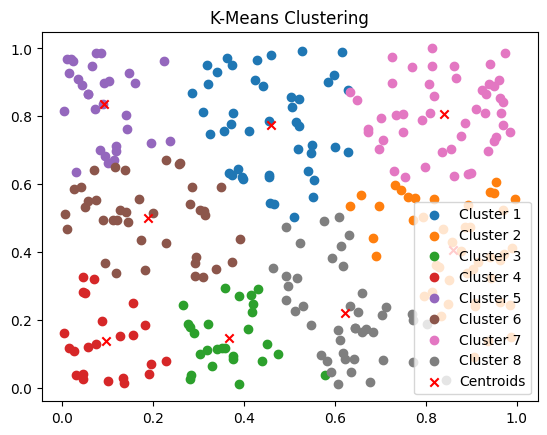

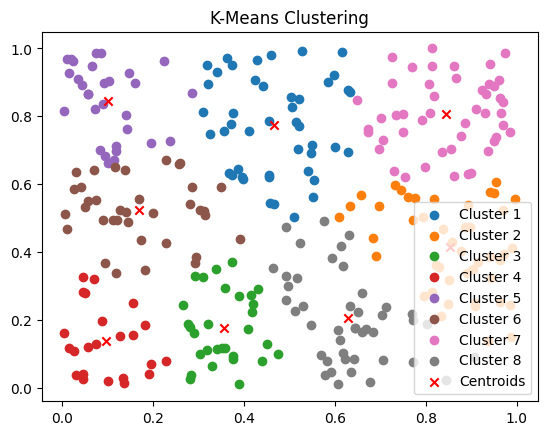

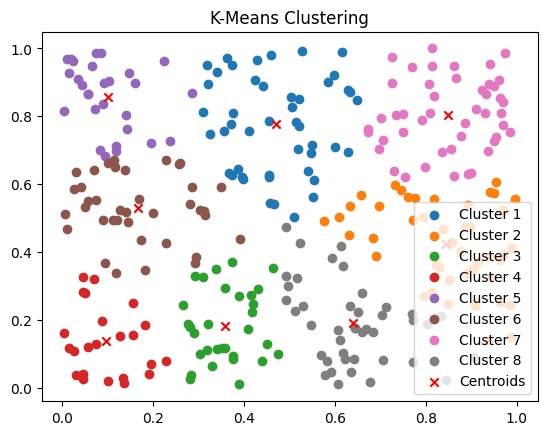

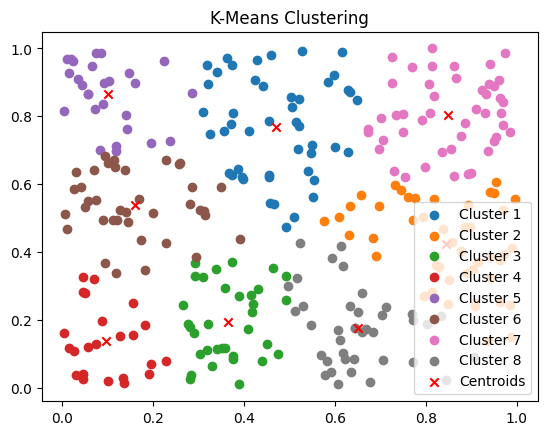

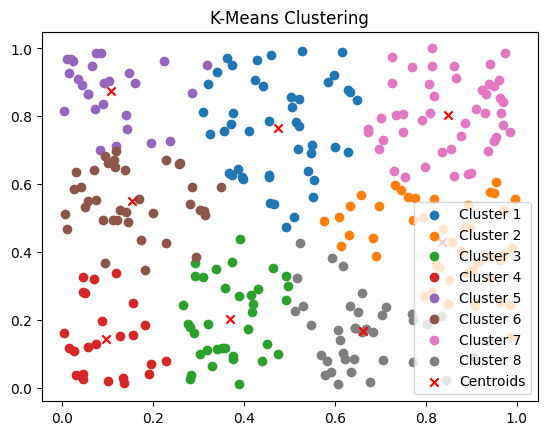

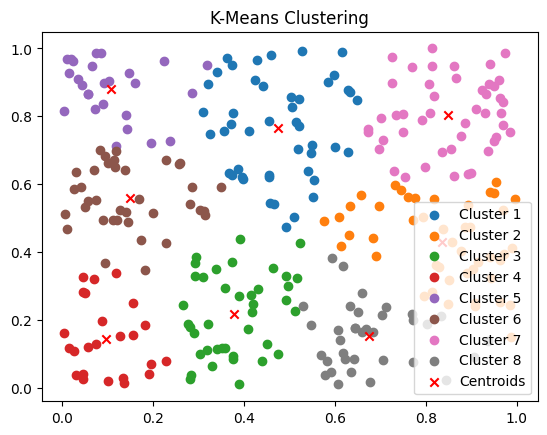

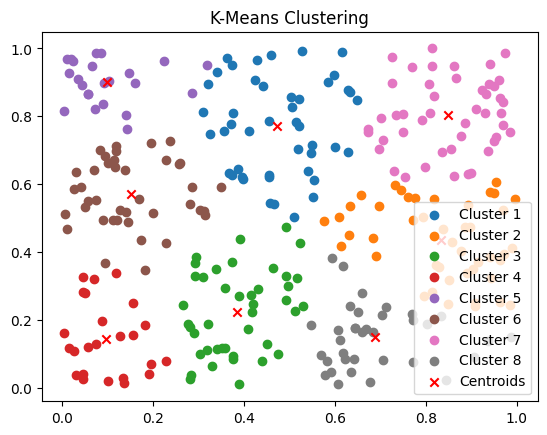

In [21]:
if __name__ == "__main__":
    np.random.seed(42)
    n_samples = 300
    max_clusters = 10
    max_iterations = 10
    X = np.random.rand(n_samples, 2)

    kmeans_with_optimal_k(X, max_clusters, max_iterations)